# Sales Analysis V2

Different data set than original

Steps Taken:
- Load Data
- Clean Data
- Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

## Load Data

In [2]:
print(os.getcwd())

/Users/niallyorke/Data/Projects/Sales_Analysis_Project


#### Load a single file to check if data can load properly

In [3]:
filename = ("../../Projects/Sales_Data/Sales_April_2019.csv")
april_sales = pd.read_csv(filename)
april_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,164286,Sony WH-1000X M3 Headphones,1,300,04/17/19 13:18,"469 Walnut St, Dublin City, DUB D01"
1,164287,Lightning Charging Cable,1,14.95,04/26/19 17:46,"406 Meadow St, Dundalk, LOU A91"
2,164288,34in Ultrawide Monitor,1,379.99,04/04/19 22:46,"448 Dorset Street St, Dunboyne, MEA A86"
3,164289,USB-C Charging Cable,1,11.95,04/29/19 09:57,"453 Meadow St, Dublin City, DUB D01"
4,164290,AA Batteries (4-pack),2,3.84,04/01/19 12:55,"711 Fownes Street St, Galway City, GAL H91"


#### Given that there are 12 files for each month, they need to be concatenated to do

- Use glob() to list all the files in a directory that match a pattern and sort the results
- Note the naming structure of the files should match to a certain point
- Mark the dynamic part of the filename with *    
    

In [4]:
from glob import glob

sales_files = sorted(glob('../../Projects/Sales_Data/Sales_*_*.csv'))
sales_files

['../../Projects/Sales_Data/Sales_April_2019.csv',
 '../../Projects/Sales_Data/Sales_August_2019.csv',
 '../../Projects/Sales_Data/Sales_December_2019.csv',
 '../../Projects/Sales_Data/Sales_February_2019.csv',
 '../../Projects/Sales_Data/Sales_January_2019.csv',
 '../../Projects/Sales_Data/Sales_July_2019.csv',
 '../../Projects/Sales_Data/Sales_June_2019.csv',
 '../../Projects/Sales_Data/Sales_March_2019.csv',
 '../../Projects/Sales_Data/Sales_May_2019.csv',
 '../../Projects/Sales_Data/Sales_November_2019.csv',
 '../../Projects/Sales_Data/Sales_October_2019.csv',
 '../../Projects/Sales_Data/Sales_September_2019.csv']

In [5]:
#for each file in sales_files, read it, open it and concatenate them
all_sales = pd.concat((pd.read_csv(file)
          for file in sales_files))
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167272 entries, 0 to 14169
Data columns (total 6 columns):
Order ID            166822 non-null object
Product             166822 non-null object
Quantity Ordered    166822 non-null object
Price Each          166822 non-null object
Order Date          166822 non-null object
Purchase Address    166822 non-null object
dtypes: object(6)
memory usage: 8.9+ MB


In [6]:
#save the concatentated files to a csv
all_sales.to_csv('All_Sales.csv', index=False)

In [7]:
#load the all_sales file
filename=("../../Projects/Sales_Analysis_Project/All_Sales.csv")
all_sales = pd.read_csv(filename)

In [8]:
#info matches that 
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167272 entries, 0 to 167271
Data columns (total 6 columns):
Order ID            166822 non-null object
Product             166822 non-null object
Quantity Ordered    166822 non-null object
Price Each          166822 non-null object
Order Date          166822 non-null object
Purchase Address    166822 non-null object
dtypes: object(6)
memory usage: 7.7+ MB


In [9]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,164286,Sony WH-1000X M3 Headphones,1,300,04/17/19 13:18,"469 Walnut St, Dublin City, DUB D01"
1,164287,Lightning Charging Cable,1,14.95,04/26/19 17:46,"406 Meadow St, Dundalk, LOU A91"
2,164288,34in Ultrawide Monitor,1,379.99,04/04/19 22:46,"448 Dorset Street St, Dunboyne, MEA A86"
3,164289,USB-C Charging Cable,1,11.95,04/29/19 09:57,"453 Meadow St, Dublin City, DUB D01"
4,164290,AA Batteries (4-pack),2,3.84,04/01/19 12:55,"711 Fownes Street St, Galway City, GAL H91"


## Data Cleaning and Preperation
- Remove NaN values
- Identify any other issues i.e. duplicates, incorrect string formatting

In [10]:
#create df to count how many null objects there are
nan_df = all_sales[all_sales.isnull().any(axis=1)]
nan_df[:]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
66,NaN,NaN,NaN,NaN,NaN,NaN
1026,NaN,NaN,NaN,NaN,NaN,NaN
1212,NaN,NaN,NaN,NaN,NaN,NaN
1375,NaN,NaN,NaN,NaN,NaN,NaN
1694,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
165679,NaN,NaN,NaN,NaN,NaN,NaN
166522,NaN,NaN,NaN,NaN,NaN,NaN
166686,NaN,NaN,NaN,NaN,NaN,NaN
166899,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#These rows can be removed using dropna(). how='all' can be used here as NaN stretches across entire rows
all_sales = all_sales.dropna(how='all')
all_sales[:]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,164286,Sony WH-1000X M3 Headphones,1,300,04/17/19 13:18,"469 Walnut St, Dublin City, DUB D01"
1,164287,Lightning Charging Cable,1,14.95,04/26/19 17:46,"406 Meadow St, Dundalk, LOU A91"
2,164288,34in Ultrawide Monitor,1,379.99,04/04/19 22:46,"448 Dorset Street St, Dunboyne, MEA A86"
3,164289,USB-C Charging Cable,1,11.95,04/29/19 09:57,"453 Meadow St, Dublin City, DUB D01"
4,164290,AA Batteries (4-pack),2,3.84,04/01/19 12:55,"711 Fownes Street St, Galway City, GAL H91"
...,...,...,...,...,...,...
167267,244909,USB-C Charging Cable,1,11.95,09/04/19 19:14,"768 Walnut St, Monaghan Town, MON H18"
167268,244910,Wired Headphones,1,11.99,09/30/19 14:42,"93 Sunset St, Cork City, COR T12"
167269,244911,Lightning Charging Cable,1,14.95,09/25/19 18:30,"382 Lakeview St, Dublin City, DUB D01"
167270,244912,AA Batteries (4-pack),1,3.84,09/14/19 06:13,"32 Crown Alley St, Dublin City, DUB D01"


From examining the head preview above, the Purchase Address column contains incorrect string formats. There are multiple cases of "Street" and "St" clashing. The word "Street" needs to be removed

In [12]:
all_sales['Purchase Address']= all_sales['Purchase Address'].replace('Street','',regex=True)
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,164286,Sony WH-1000X M3 Headphones,1,300,04/17/19 13:18,"469 Walnut St, Dublin City, DUB D01"
1,164287,Lightning Charging Cable,1,14.95,04/26/19 17:46,"406 Meadow St, Dundalk, LOU A91"
2,164288,34in Ultrawide Monitor,1,379.99,04/04/19 22:46,"448 Dorset St, Dunboyne, MEA A86"
3,164289,USB-C Charging Cable,1,11.95,04/29/19 09:57,"453 Meadow St, Dublin City, DUB D01"
4,164290,AA Batteries (4-pack),2,3.84,04/01/19 12:55,"711 Fownes St, Galway City, GAL H91"


Upon trying to convert the Month column to a numeric data type, the following error was encountered:
- ValueError: invalid literal for int() with base 10: 'Or'
- Order matches 'Or'

In [13]:
or_df = all_sales[all_sales['Order Date'].str[0:2] =='Or']
or_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
488,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
734,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2031,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3425,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3464,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
all_sales = all_sales[all_sales['Order Date'].str[0:2] !='Or']

### Add a Month Column

In [15]:
#Can take the first two characters of the Order Date column
all_sales.insert(5, 'Month', (all_sales['Order Date'].str[:2]))

In [16]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,164286,Sony WH-1000X M3 Headphones,1,300,04/17/19 13:18,04,"469 Walnut St, Dublin City, DUB D01"
1,164287,Lightning Charging Cable,1,14.95,04/26/19 17:46,04,"406 Meadow St, Dundalk, LOU A91"
2,164288,34in Ultrawide Monitor,1,379.99,04/04/19 22:46,04,"448 Dorset St, Dunboyne, MEA A86"
3,164289,USB-C Charging Cable,1,11.95,04/29/19 09:57,04,"453 Meadow St, Dublin City, DUB D01"
4,164290,AA Batteries (4-pack),2,3.84,04/01/19 12:55,04,"711 Fownes St, Galway City, GAL H91"


In [17]:
all_sales.astype({'Month':'int32'}).dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Month                int32
Purchase Address    object
dtype: object

In [18]:
all_sales['Quantity Ordered'] = all_sales['Quantity Ordered'].astype('int32')
all_sales['Price Each'] = all_sales['Price Each'].astype('float64')
all_sales['Price Each'] = all_sales['Price Each'].round(2)

### Add a Sales Column

In [19]:
all_sales['Sales'] = all_sales['Quantity Ordered']*all_sales['Price Each']

In [20]:
all_sales = all_sales[['Order ID','Product','Quantity Ordered','Price Each','Sales','Order Date','Month','Purchase Address']]
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,164286,Sony WH-1000X M3 Headphones,1,300.00,300.00,04/17/19 13:18,04,"469 Walnut St, Dublin City, DUB D01"
1,164287,Lightning Charging Cable,1,14.95,14.95,04/26/19 17:46,04,"406 Meadow St, Dundalk, LOU A91"
2,164288,34in Ultrawide Monitor,1,379.99,379.99,04/04/19 22:46,04,"448 Dorset St, Dunboyne, MEA A86"
3,164289,USB-C Charging Cable,1,11.95,11.95,04/29/19 09:57,04,"453 Meadow St, Dublin City, DUB D01"
4,164290,AA Batteries (4-pack),2,3.84,7.68,04/01/19 12:55,04,"711 Fownes St, Galway City, GAL H91"


### Add a City Column

In [21]:
def get_city(f):
    return f.split(', ')[1]

def get_county(f):
    return f.split(', ')[2].split(' ')[0]
    
test = all_sales['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_county(x)}")    

In [22]:
all_sales.insert(8, 'City', test)

In [23]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,164286,Sony WH-1000X M3 Headphones,1,300.00,300.00,04/17/19 13:18,04,"469 Walnut St, Dublin City, DUB D01",Dublin City DUB
1,164287,Lightning Charging Cable,1,14.95,14.95,04/26/19 17:46,04,"406 Meadow St, Dundalk, LOU A91",Dundalk LOU
2,164288,34in Ultrawide Monitor,1,379.99,379.99,04/04/19 22:46,04,"448 Dorset St, Dunboyne, MEA A86",Dunboyne MEA
3,164289,USB-C Charging Cable,1,11.95,11.95,04/29/19 09:57,04,"453 Meadow St, Dublin City, DUB D01",Dublin City DUB
4,164290,AA Batteries (4-pack),2,3.84,7.68,04/01/19 12:55,04,"711 Fownes St, Galway City, GAL H91",Galway City GAL


## Analysis

### Question 1): What was the best month for sales? How much was earned that month?
- Need to add a Month column
- Need to add a Sales column; Sales * Quantity Ordered
- groupby Month then

In [24]:
best_month = all_sales.groupby('Month').sum()
best_month.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28922,7.009137e+06,7.040456e+06
05,21917,5.549524e+06,5.571854e+06
11,22798,5.526075e+06,5.551055e+06
06,16990,4.244430e+06,4.263060e+06
09,15875,3.917128e+06,3.932659e+06
04,14866,3.710339e+06,3.725904e+06
10,14211,3.459995e+06,3.472683e+06
01,12740,3.182674e+06,3.192125e+06
07,12667,3.092042e+06,3.104320e+06


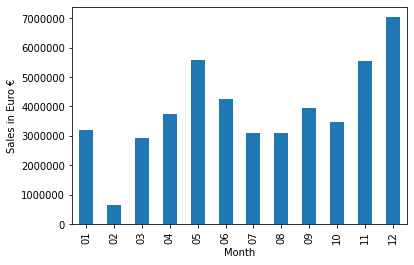

In [25]:
#Visualise - 
best_month_sales = all_sales.groupby('Month').sum()['Sales']
best_month_sales.plot.bar()
plt.ylabel('Sales in Euro €')
plt.show()

#best_month_sales.plot.barh()
#plt.xlabel('Sales in US $')
#plt.ylabel('Month')
#plt.show()

### Question 2) What Irish city had the highest number of sales?

In [26]:
best_month_city = all_sales.groupby('City').sum()
best_month_city.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
City,,,
Dublin City DUB,44954,1.118423e+07,1.122630e+07
Dunboyne MEA,30286,7.249800e+06,7.278899e+06
Cork City COR,24977,6.271320e+06,6.293912e+06
Galway City GAL,20159,4.953586e+06,4.972879e+06
Dundalk LOU,15023,3.748390e+06,3.769544e+06
Limerick City LIM,15044,3.704271e+06,3.718425e+06
Monaghan Town MON,15038,3.694154e+06,3.712626e+06
Wexford City WEX,10131,2.464681e+06,2.473416e+06
Kilkenny Town KIL,9931,2.451898e+06,2.460720e+06


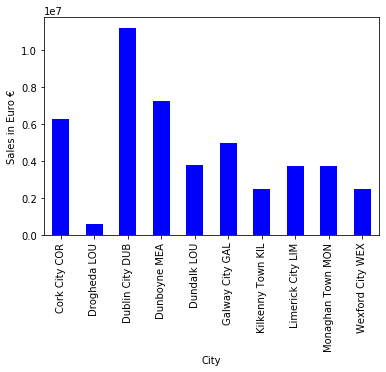

In [27]:
#Visualise - Cant get Sales to format correctly on yaxis
best_city_sales = all_sales.groupby('City').sum()['Sales']
best_city_sales.plot.bar(color='b')
plt.ylabel('Sales in Euro €')
plt.show()

### Question 3): What time should we display advertisemens to maximise the likelihood of customer’s buying product?

In [28]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,164286,Sony WH-1000X M3 Headphones,1,300.00,300.00,04/17/19 13:18,04,"469 Walnut St, Dublin City, DUB D01",Dublin City DUB
1,164287,Lightning Charging Cable,1,14.95,14.95,04/26/19 17:46,04,"406 Meadow St, Dundalk, LOU A91",Dundalk LOU
2,164288,34in Ultrawide Monitor,1,379.99,379.99,04/04/19 22:46,04,"448 Dorset St, Dunboyne, MEA A86",Dunboyne MEA
3,164289,USB-C Charging Cable,1,11.95,11.95,04/29/19 09:57,04,"453 Meadow St, Dublin City, DUB D01",Dublin City DUB
4,164290,AA Batteries (4-pack),2,3.84,7.68,04/01/19 12:55,04,"711 Fownes St, Galway City, GAL H91",Galway City GAL


In [29]:
all_sales['Order Date'] = pd.to_datetime(all_sales['Order Date'])

In [30]:
all_sales.insert(6, 'Hour', all_sales['Order Date'].dt.hour)


In [31]:
hourly_sales = all_sales.groupby('Hour').sum()['Quantity Ordered']

In [32]:
hourly_sales

Hour
0      4210
1      2440
2      1243
3       702
4       803
5      1313
6      2364
7      4191
8      6234
9      8798
10    11048
11    12537
12    12723
13    12198
14    11071
15    10472
16    10393
17    11379
18    12205
19    12546
20    12751
21    11086
22     8905
23     6401
Name: Quantity Ordered, dtype: int32

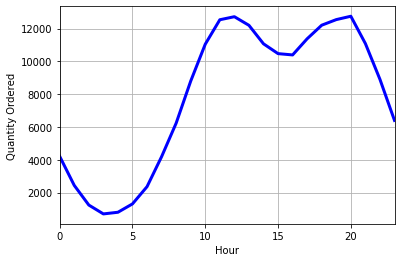

In [33]:
hourly_sales.plot.line(color='b',linewidth=3, markersize=15)
plt.ylabel('Quantity Ordered')
plt.grid()
plt.show()

### Question 4): What products are most often sold together?
- group by time sold at?
- Focus on Order ID
- Break the question down:
    - What rows have duplicate values?
    - Group these duplicate values based on order id and product.
    - Count how many of each pair there is
    

In [34]:
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,Purchase Address,City
0,164286,Sony WH-1000X M3 Headphones,1,300.00,300.00,2019-04-17 13:18:00,13,04,"469 Walnut St, Dublin City, DUB D01",Dublin City DUB
1,164287,Lightning Charging Cable,1,14.95,14.95,2019-04-26 17:46:00,17,04,"406 Meadow St, Dundalk, LOU A91",Dundalk LOU
2,164288,34in Ultrawide Monitor,1,379.99,379.99,2019-04-04 22:46:00,22,04,"448 Dorset St, Dunboyne, MEA A86",Dunboyne MEA
3,164289,USB-C Charging Cable,1,11.95,11.95,2019-04-29 09:57:00,9,04,"453 Meadow St, Dublin City, DUB D01",Dublin City DUB
4,164290,AA Batteries (4-pack),2,3.84,7.68,2019-04-01 12:55:00,12,04,"711 Fownes St, Galway City, GAL H91",Galway City GAL
...,...,...,...,...,...,...,...,...,...,...
167267,244909,USB-C Charging Cable,1,11.95,11.95,2019-09-04 19:14:00,19,09,"768 Walnut St, Monaghan Town, MON H18",Monaghan Town MON
167268,244910,Wired Headphones,1,11.99,11.99,2019-09-30 14:42:00,14,09,"93 Sunset St, Cork City, COR T12",Cork City COR
167269,244911,Lightning Charging Cable,1,14.95,14.95,2019-09-25 18:30:00,18,09,"382 Lakeview St, Dublin City, DUB D01",Dublin City DUB
167270,244912,AA Batteries (4-pack),1,3.84,3.84,2019-09-14 06:13:00,6,09,"32 Crown Alley St, Dublin City, DUB D01",Dublin City DUB


In [35]:
#duplicate rows
order_dup = all_sales[all_sales.duplicated(subset='Order ID', keep=False)]
order_dup

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,Purchase Address,City
16,164302,Samsung Galaxy S10,1,779.00,779.00,2019-04-28 22:27:00,22,04,"798 Adams Place St, Kilkenny Town, KIL R95",Kilkenny Town KIL
17,164302,USB-C Charging Cable,2,11.95,23.90,2019-04-28 22:27:00,22,04,"798 Adams Place St, Kilkenny Town, KIL R95",Kilkenny Town KIL
18,164302,Lightning Charging Cable,1,14.95,14.95,2019-04-28 22:27:00,22,04,"798 Adams Place St, Kilkenny Town, KIL R95",Kilkenny Town KIL
44,164328,Apple Airpods Headphones,1,150.00,150.00,2019-04-28 12:50:00,12,04,"133 Pine St, Dublin City, DUB D01",Dublin City DUB
45,164328,iPhone XS,1,770.00,770.00,2019-04-28 12:50:00,12,04,"133 Pine St, Dublin City, DUB D01",Dublin City DUB
...,...,...,...,...,...,...,...,...,...,...
167178,244822,USB-C Charging Cable,1,11.95,11.95,2019-09-02 20:04:00,20,09,"783 River St, Galway City, GAL H91",Galway City GAL
167241,244885,Sony WH-1000X M3 Headphones,1,300.00,300.00,2019-09-23 12:11:00,12,09,"160 Main St, Cork City, COR T12",Cork City COR
167242,244885,Apple Airpods Headphones,1,150.00,150.00,2019-09-23 12:11:00,12,09,"160 Main St, Cork City, COR T12",Cork City COR
167265,244908,Macbook Pro Laptop,1,1700.00,1700.00,2019-09-27 14:38:00,14,09,"275 Meadow St, Dublin City, DUB D01",Dublin City DUB


In [36]:
#create new column containing products sold together
#create new column, group the order id's and select only product, use a function to print the products side by side
order_dup['Grouped'] = order_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


#remove duplicate rows 
order_dup = order_dup[['Order ID', 'Grouped']].drop_duplicates()
order_dup.head()

/Users/niallyorke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
16,164302,"Samsung Galaxy S10, USB-C Charging Cable, Ligh..."
44,164328,"Apple Airpods Headphones, iPhone XS"
74,164356,"20in Monitor, AAA Batteries (4-pack)"
79,164360,"iPhone XS, Lightning Charging Cable, Apple Air..."
85,164364,"Samsung Galaxy S10, Wired Headphones"


In [37]:
#Count how many of each group there is
#A counter tool is provided to support convenient and rapid tallies
from itertools import combinations
from collections import Counter

count = Counter()

for x in order_dup['Grouped']:
    row_split = x.split(',')
    count.update(Counter(combinations(row_split, 2)))

    
#Pairs
pair = count.most_common(10)
pair_df = pd.DataFrame(pair, columns = ['Product A/B','Count'])
pair_df

,Product A/B,Count
0,"(iPhone XS, Lightning Charging Cable)",943
1,"(Samsung Galaxy S10, USB-C Charging Cable)",902
2,"(iPhone XS, Wired Headphones)",458
3,"(Samsung Galaxy S10, Wired Headphones)",372
4,"(Google Pixel 3, USB-C Charging Cable)",356
5,"(iPhone XS, Apple Airpods Headphones)",304
6,"(Samsung Galaxy S10, Sony WH-1000X M3 Headpho...",179
7,"(Google Pixel 3, Wired Headphones)",150
8,"( USB-C Charging Cable, Wired Headphones)",109
9,"(Google Pixel 3, Sony WH-1000X M3 Headphones)",82


In [38]:
#Count how many of each group there is
#A counter tool is provided to support convenient and rapid tallies
from itertools import combinations
from collections import Counter

count = Counter()

for x in order_dup['Grouped']:
    row_split = x.split(',')
    count.update(Counter(combinations(row_split, 3)))

#Groups of three    
count.most_common(10)
treble_df = pd.DataFrame(pair, columns = ['Product A/B/C','Count'])
treble_df

,Product A/B/C,Count
0,"(iPhone XS, Lightning Charging Cable)",943
1,"(Samsung Galaxy S10, USB-C Charging Cable)",902
2,"(iPhone XS, Wired Headphones)",458
3,"(Samsung Galaxy S10, Wired Headphones)",372
4,"(Google Pixel 3, USB-C Charging Cable)",356
5,"(iPhone XS, Apple Airpods Headphones)",304
6,"(Samsung Galaxy S10, Sony WH-1000X M3 Headpho...",179
7,"(Google Pixel 3, Wired Headphones)",150
8,"( USB-C Charging Cable, Wired Headphones)",109
9,"(Google Pixel 3, Sony WH-1000X M3 Headphones)",82


### Question 5): What products sold the most?


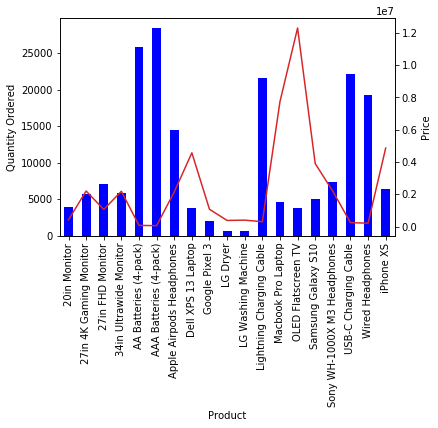

In [42]:
#bar chart for quantity ordered
best_product_sales = all_sales.groupby('Product').sum()['Quantity Ordered']
data2 = all_sales.groupby('Product').sum()['Price Each']
ax1 = best_product_sales.plot.bar(color='b')

plt.ylabel('Quantity Ordered')

#line graph to show relationship between price and quantity ordered
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Price')
ax2.plot(data2,color=color)
ax2.tick_params(axis='y')


plt.show()
